<a href="https://colab.research.google.com/github/Sana-Gupta/AcmProject/blob/master/PrjPLANTDISEASE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>Project Name : </h1>**
**<h2>Description : </h2>**
**<h2>Team Members :</h2>**

1.   Name 1
2.   Name 2
3.   Name 3
4.   Name 4
5.   Name 5



In [ ]:
#Downloading Dataset
!git clone https://github.com/spMohanty/PlantVillage-Dataset.git

Cloning into 'PlantVillage-Dataset'...
remote: Enumerating objects: 163229, done.
remote: Total 163229 (delta 0), reused 0 (delta 0), pack-reused 163229
Receiving objects: 100% (163229/163229), 2.00 GiB | 13.74 MiB/s, done.
Resolving deltas: 100% (99/99), done.
Checking out files: 100% (182401/182401), done.


In [ ]:
from os import listdir
import cv2
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [ ]:
#initialization
directory_path='/content/PlantVillage-Dataset/raw/color'

In [ ]:
rootdir=listdir(directory_path)


In [ ]:
#from google.colab import drive
##drive.mount('/content/drive')

In [ ]:
def convert_image_to_array(image_dir): ##isme convert krege  array m images
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e: ##isme?? ye error btayega agar koi error aata hai to#ye jo try except hota if else ki trh hota hai , agar try vala kaam ni kia to except mae eror ko catch krke print krega.
        print(f"Error : {e}")
        return None

In [ ]:
##isme hmari ram bhot consume 
#hanji , because of function convert image to array
# hr ek image ki value = 256 x 256 x 3 = 190000+ hai
# hmarr paas total 54000+ images hai
# to 54000 values ke liye around 109 Crore + values ho rhi hai 
# 54000 x 256 x 256 x 3
# to usse bhtt ram bhr rhi hai , 12GB bhi kum pd gyi 
#image_list = []
#for classFolder in rootdir:
  #imageFolderPath = listdir(f"{directory_path}/{classFolder}")
  #for image in imageFolderPath:
  # imagePath = f"{directory_path}/{classFolder}/{image}"
   # image_list.append(convert_image_to_array(imagePath))

In [ ]:
print("[INFO] LOADING DATA...") ##isme hmm hr ek folder mae kitni images hai , vo dekh rhe hai okkk
for classFolder in rootdir:
  print("[FOLDER] "+classFolder)
  imageFolderPath = listdir(f"{directory_path}/{classFolder}")
  lengthImages = len(imageFolderPath)
  print("Images : "+str(lengthImages))

[INFO] LOADING DATA...
[FOLDER] Peach___Bacterial_spot
Images : 2297
[FOLDER] Soybean___healthy
Images : 5090
[FOLDER] Grape___Black_rot
Images : 1180
[FOLDER] Tomato___healthy
Images : 1591
[FOLDER] Blueberry___healthy
Images : 1502
[FOLDER] Tomato___Spider_mites Two-spotted_spider_mite
Images : 1676
[FOLDER] Pepper,_bell___Bacterial_spot
Images : 997
[FOLDER] Corn_(maize)___Northern_Leaf_Blight
Images : 985
[FOLDER] Grape___healthy
Images : 423
[FOLDER] Apple___Cedar_apple_rust
Images : 275
[FOLDER] Tomato___Early_blight
Images : 1000
[FOLDER] Grape___Esca_(Black_Measles)
Images : 1383
[FOLDER] Potato___Late_blight
Images : 1000
[FOLDER] Peach___healthy
Images : 360
[FOLDER] Orange___Haunglongbing_(Citrus_greening)
Images : 5507
[FOLDER] Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Images : 1076
[FOLDER] Corn_(maize)___healthy
Images : 1162
[FOLDER] Potato___healthy
Images : 152
[FOLDER] Tomato___Septoria_leaf_spot
Images : 1771
[FOLDER] Cherry_(including_sour)___healthy
Images : 854
[

In [ ]:
##iske bd hm keras use krke photo data ko load krke training and validation maensplit krenge okk

In [ ]:
#ImageDataGenerator keras ka function hai
#Jisko use krke hum hmari picture ko scale kr re , zoom vagera, rotate kr re , or validation mae 20% data and training mae 80% data rkh rhe hai
#shuffle b kra images ko aapas mae 
dataGeneration = ImageDataGenerator(validation_split=0.2,rotation_range=25,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True,fill_mode="nearest")

In [ ]:
#flow from directory ek DirectoryIterator hai mtlb hr ek directory mae jakr image utha rhi 
#frbus image ko dataGeneration mae jo store hai uske accoring convert kr rhi , usko grayscale mae convert 
#krke array bnakr Training dataset bna rhi , our training dataset is in trainGenerator okk
trainGenerator =dataGeneration.flow_from_directory('/content/PlantVillage-Dataset/raw/color',target_size=(256,256),batch_size=128,shuffle=True,class_mode="categorical",subset="training")

Found 43456 images belonging to 38 classes.


In [ ]:
classes=trainGenerator.class_indices #show krne  k liye  with folder name
j=0
for i in classes:
  print(str(j)+". "+i)
  j = j+1

0. Apple___Apple_scab
1. Apple___Black_rot
2. Apple___Cedar_apple_rust
3. Apple___healthy
4. Blueberry___healthy
5. Cherry_(including_sour)___Powdery_mildew
6. Cherry_(including_sour)___healthy
7. Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
8. Corn_(maize)___Common_rust_
9. Corn_(maize)___Northern_Leaf_Blight
10. Corn_(maize)___healthy
11. Grape___Black_rot
12. Grape___Esca_(Black_Measles)
13. Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
14. Grape___healthy
15. Orange___Haunglongbing_(Citrus_greening)
16. Peach___Bacterial_spot
17. Peach___healthy
18. Pepper,_bell___Bacterial_spot
19. Pepper,_bell___healthy
20. Potato___Early_blight
21. Potato___Late_blight
22. Potato___healthy
23. Raspberry___healthy
24. Soybean___healthy
25. Squash___Powdery_mildew
26. Strawberry___Leaf_scorch
27. Strawberry___healthy
28. Tomato___Bacterial_spot
29. Tomato___Early_blight
30. Tomato___Late_blight
31. Tomato___Leaf_Mold
32. Tomato___Septoria_leaf_spot
33. Tomato___Spider_mites Two-spotted_spider_m

In [ ]:
validGenerator =dataGeneration.flow_from_directory('/content/PlantVillage-Dataset/raw/color',target_size=(256,256),batch_size=128,shuffle=True,class_mode="categorical",subset="validation")

Found 10849 images belonging to 38 classes.


In [ ]:
trainGenerator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [ ]:
trainGenerator.classes

array([ 0,  0,  0, ..., 37, 37, 37], dtype=int32)

In [ ]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam 
from keras import backend as K 

In [ ]:
model = Sequential()
height = 256
width = 256
depth = 3 # 3 channels RGB
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3)))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(38)) #output classes kitni hai vo hai ye
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 256, 256, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 85, 85, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 85, 85, 64)       

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ep = 43456//128
print(ep)

339


In [ ]:
model_fit=model.fit(trainGenerator,
                    steps_per_epoch=43456//128,
                    epochs=10,
                    shuffle=True,
                    validation_data=validGenerator)

Epoch 1/10
339/339 [==============================] - 838s 2s/step - loss: 0.7704 - accuracy: 0.7685 - val_loss: 3.7019 - val_accuracy: 0.4188
Epoch 2/10
339/339 [==============================] - 827s 2s/step - loss: 0.3882 - accuracy: 0.8777 - val_loss: 0.6994 - val_accuracy: 0.7519
Epoch 3/10
339/339 [==============================] - 833s 2s/step - loss: 0.2716 - accuracy: 0.9127 - val_loss: 0.6506 - val_accuracy: 0.8189
Epoch 4/10
339/339 [==============================] - 833s 2s/step - loss: 0.1915 - accuracy: 0.9386 - val_loss: 0.2031 - val_accuracy: 0.9279
Epoch 5/10
339/339 [==============================] - 840s 2s/step - loss: 0.1552 - accuracy: 0.9487 - val_loss: 0.3722 - val_accuracy: 0.9129
Epoch 6/10
339/339 [==============================] - 843s 2s/step - loss: 0.1375 - accuracy: 0.9555 - val_loss: 0.2800 - val_accuracy: 0.8895
Epoch 7/10
339/339 [==============================] - 846s 2s/step - loss: 0.1189 - accuracy: 0.9611 - val_loss: 0.2198 - val_accuracy: 0.9372

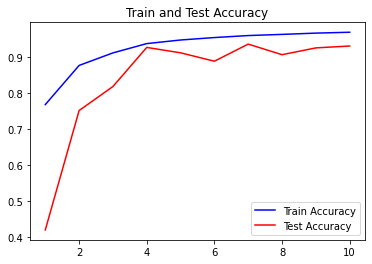

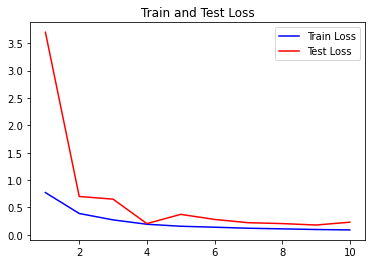

In [ ]:
accur = model_fit.history["accuracy"]
val_accur = model_fit.history["val_accuracy"]
loss = model_fit.history["loss"]
val_loss = model_fit.history["val_loss"]
from matplotlib import pyplot as plt
%matplotlib inline
#Graph of Train and Validation Accuracy
epochs = range(1,len(accur) + 1)
plt.plot(epochs,accur,'b',label="Train Accuracy")
plt.plot(epochs,val_accur,'r',label="Test Accuracy")
plt.title("Train and Test Accuracy")
plt.legend()

#Graph of Train and Test Loss
plt.figure()
plt.plot(epochs,loss,'b',label="Train Loss")
plt.plot(epochs,val_loss,'r',label="Test Loss")
plt.title("Train and Test Loss")
plt.legend()
plt.show()

In [ ]:
print("Calculating Model Accuracy : ")
scores = model.evaluate(validGenerator)
print(f"Test Accuracy : {scores[1]*100}")

Calculating Model Accuracy : 
85/85 [==============================] - 150s 2s/step
Test Accuracy : 93.28970313072205


In [ ]:
print("Saving Model...")
model.save("PlantDisease.h5")

Saving Model...


In [ ]:
from keras.models import load_model
model2 = load_model("PlantDisease.h5")

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 256, 256, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 85, 85, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 85, 85, 64)       